# Wind Speed and Direction from Michael Ossmann SDR Intro

Calculate average wind speed and direction vector using complex numbers. This needs to be viewed in a Jupyter notebook to see the resulting matplotlib graph in polar coordinates. Note with poloar coordinates, 0 degrees is on the right, not on the top (where you'd expect to be North).

From Michael Ossman's [Intro to SDR with HackRF](http://greatscottgadgets.com/sdr/) on-line tutorial.

See [lesson 6](http://greatscottgadgets.com/sdr/6/) and [lesson 7](http://greatscottgadgets.com/sdr/7/)

Input is a list of wind direction and speed readings using degrees, speed.

http://greatscottgadgets.com/sdr/  



In [6]:
%matplotlib inline
import cmath
from matplotlib.pylab import *
tau = 2 * pi
def average(readings):
    base = e ** (1j * tau / 360)
    total = 0
    for r in readings:
        v = r[1] * base ** r[0]
        total += v
        arrow(0, 0, v.real, v.imag, head_width=0.05, head_length=0.05, fc='r', ec='r')
    result = total / len(readings)
    arrow(0, 0, result.real, result.imag, head_width=0.05, head_length=0.05, fc='b', ec='b')
    xlim((-1.5, 1.5))
    ylim((-1.5, 1.5))
    ylabel('Imaginary')
    xlabel('Real')
    return (cmath.log(result, base).real, abs(result))



## Example 1

Several readings, all in the same direction, between 9 and 16 degress.

Note: This test case would be easy for many algorithms, same direction, doesn't cross zero, ...

(13.000304779886221, 0.9990864214521125)

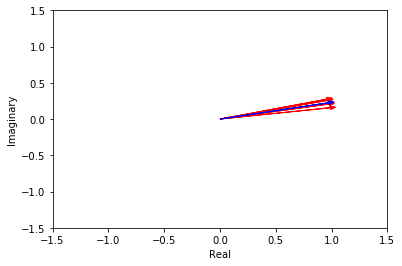

In [7]:
average([(12,1),(15,1),(13,1),(9,1),(16,1)])

## Example 2

Slightly harder, directions cross around 0.

(-0.9996952201137814, 0.9990864214521121)

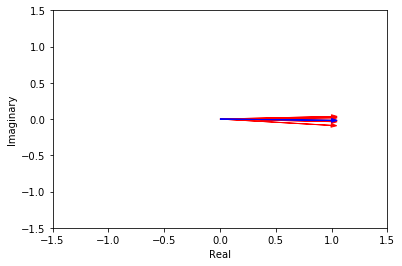

In [8]:
average([(358,1), (1,1), (359,1), (355,1), (2,1)])

## Example 3

(89.99999999999628, 6.123233995736766e-17)

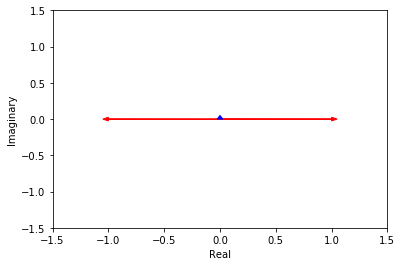

In [10]:
average([(180,1),(0,1)])